# Import packages

In [1]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.insert(1, r'C:/Users/roger/Documents/GitHub/CPR/CPR')

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
nj = (os.getcwd()=='C:\\Users\\80002036\\CEDIA Dropbox\\Nicholas-James Clavet\\Modeles\\srd\\notebooks')

if nj :
    sys.path.append('C:/Users/80002036/Documents/GitHub/srd')
    sys.path.append('C:/Users/80002036/Documents/GitHub/srpp')
    print('Utilisateur : NJ')

if not nj:
    sys.path.append('C:/Users/roger/Documents/GitHub/srd')
    sys.path.append('C:/Users/roger/Documents/GitHub/srpp')
    print('Utilisateur : Roger')

Utilisateur : Roger


# Import dataset

In [3]:
from CPR import analysis

#inputs = analysis.get_dataset()
#inputs = (pd.read_csv('C:/Users/roger/Documents/GitHub/CPR/CPR_out/CPR/data/inputs/synth_inputs.csv',index_col=0))[:25]
#inputs = (pd.read_csv('C:/Users/roger/Documents/GitHub/CPR/CPR_out/inputs.csv',index_col=0))[332:333]
#inputs = pd.read_csv('C:/Users/roger/Documents/GitHub/CPR/CPR/Notebooks/my_inputs.csv',index_col=0)
inputs = pd.read_csv('C:/Users/roger/Documents/GitHub/CPR/CPR_out/my_inputs.csv',index_col=0)
inputs.head(2)

,byear,sex,ret_age,education,init_wage,pension,bal_rrsp,bal_tfsa,bal_other_reg,bal_unreg,cont_rate_rrsp,cont_rate_tfsa,cont_rate_other_reg,cont_rate_unreg,withdrawal_rrsp,withdrawal_tfsa,withdrawal_other_reg,withdrawal_unreg,replacement_rate_db,rate_employee_db,income_previous_db,init_dc,rate_employee_dc,rate_employer_dc,s_byear,s_sex,s_ret_age,s_education,s_init_wage,s_pension,s_bal_rrsp,s_bal_tfsa,s_bal_other_reg,s_bal_unreg,s_cont_rate_rrsp,s_cont_rate_tfsa,s_cont_rate_other_reg,s_cont_rate_unreg,s_withdrawal_rrsp,s_withdrawal_tfsa,s_withdrawal_other_reg,s_withdrawal_unreg,s_replacement_rate_db,s_rate_employee_db,s_income_previous_db,s_init_dc,s_rate_employee_dc,s_rate_employer_dc,weight,couple,prov,first_residence,second_residence,price_first_residence,price_second_residence,business,price_business,mix_bonds,mix_bills,mix_equity,fee,fee_equity,credit_card,personal_loan,student_loan,car_loan,credit_line,first_mortgage,second_mortgage,other_debt,credit_card_payment,personal_loan_payment,student_loan_payment,car_loan_payment,credit_line_payment,first_mortgage_payment,second_mortgage_payment,other_debt_payment,claim_age_cpp,s_claim_age_cpp,cap_gains_unreg,s_cap_gains_unreg,realized_losses_unreg,s_realized_losses_unreg,init_room_rrsp,init_room_tfsa,s_init_room_rrsp,s_init_room_tfsa
0,1980,male,65,less than high school,60000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,False,qc,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.0,NaN,0,0,0,0,0,0,NaN,NaN


# Run model
Deterministic model and stochastic model with 25 simulations

In [4]:
from CPR import main

res_deter = main.run_simulations(inputs, 1, non_stochastic=True)
res_deter.summarize()


Deterministic Model


In [5]:
res_stoch = main.run_simulations(inputs, 25, non_stochastic=False)
res_stoch.summarize()


Stochastic Model, 25 simulations


# Analyse results

## See output

In [6]:
res_deter.output.head()

,hh_index,sim,wage_bef,pension_bef,business_bef,year_cons_bef,cons_bef,rpp_dc_bef,unreg_balance_bef,tfsa_balance_bef,wage_after,pension_after,business_after,annuity_rrsp_after,annuity_rpp_dc_after,annuity_non_rrsp_after,year_cons_after,imputed_rent_after,cons_after,debt_payments_after,fam_net_tax_liability_after,cpp_after,gis_after,oas_after,allow_surv_after,allow_couple_after,rpp_db_benefits_after,business_dividends_after
0,0,0,70558.951615,NaN,0,2035,49894.132434,0,0.0,0.0,0.0,NaN,0,0.0,0.0,0.0,2045,0.0,28909.065218,0.0,-485.359422,20493.955796,0.0,7929.75,0.0,0.0,0,0.0


In [7]:
#stop

## Merge with input and check preparedness

In [8]:
res_deter.check_preparedness()
df = res_deter.df_merged

print(f'percentage people prepared in sample: {df.prepared.mean() * 100}%')

percentage people prepared in sample: 0.0%


## RRI distribution

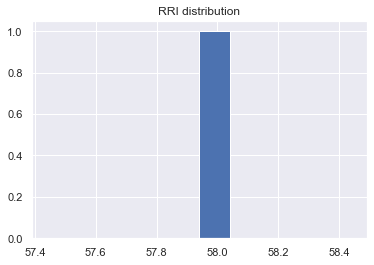

In [9]:
sns.set()
ax = df.rri[df.rri < 500].hist()
ax.set_title('RRI distribution')
plt.show()

## Risk
### Preparation rate at aggregate level

In [10]:
res_stoch.check_preparedness()
df = res_stoch.df_merged

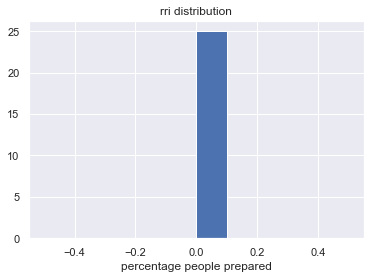

In [11]:
ax = df.groupby('sim')['prepared'].mean().hist()
ax.grid()
ax.set_title('rri distribution')
ax.set_xlabel('percentage people prepared')
ax.grid()
plt.show()

## Experiments

### Selling first residence

In [12]:
vars(res_deter.common)

{'nsim': 1,
 'non_stochastic': True,
 'base_year': 2022,
 'db_penalty_early_ret': 0.05,
 'rrsp_limit_2018': 26230.0,
 'rrsp_limit_2019': 26500.0,
 'rrsp_limit_2020': 27230.0,
 'rrsp_limit_2021': 27830.0,
 'rrsp_limit_2022': 29210.0,
 'rrsp_limit_2023': 30780.0,
 'rrsp_limit_2024': 31560.0,
 'tfsa_limit_2018': 5500.0,
 'tfsa_limit_2019': 6000.0,
 'tfsa_limit_2020': 6000.0,
 'tfsa_limit_2021': 6000.0,
 'tfsa_limit_2022': 6000.0,
 'tfsa_limit_2023': 6500.0,
 'gr_wages': 0.01,
 'gr_tfsa_limit': 0.02,
 'gr_ympe': 0.03,
 'perc_cpp_2018': 0.25,
 'perc_cpp_2019': 0.262,
 'perc_cpp_2020': 0.274,
 'perc_cpp_2021': 0.29,
 'perc_cpp_2022': 0.31,
 'perc_cpp_2023': 0.33,
 'future_years': 110,
 'official_ret_age': 65,
 'min_age_cpp': 18,
 'max_ret_age': 75,
 'min_claim_age_cpp': 60,
 'max_claim_age_cpp': 70,
 'max_term_debts': 30,
 'age_cons_bef_ret': 55,
 'past_years': 50,
 'max_years_db': 35,
 'fee_rpp': 0.015,
 'max_age_no_rrif': 71,
 'frac_cap_gains': 0.5,
 'mix_bills_rpp': 0.0,
 'mix_bonds_rpp':

In [13]:
res_not_selling = main.run_simulations(inputs, 1, non_stochastic=True,
                                       sell_first_resid=False)
res_not_selling.summarize()
res_not_selling.check_preparedness()
df = res_not_selling.df_merged

print(f'\npercentage people prepared without selling house: {df.prepared.mean() * 100:.2f}%')

res_selling = main.run_simulations(inputs, 1, non_stochastic=True,
                                   sell_first_resid=True)
res_selling.summarize()
res_selling.check_preparedness()
df = res_selling.df_merged

print(f'\npercentage people prepared when selling house: {df.prepared.mean() * 100:.2f}%')


Deterministic Model

Extra parameters:
sell_first_resid: False

percentage people prepared without selling house: 0.00%

Deterministic Model

Extra parameters:
sell_first_resid: True

percentage people prepared when selling house: 0.00%


In [14]:
vars(res_deter.prices)

{'seed': 0,
 'inflation_rate': 0.02,
 'ret_equity_2018': -0.085,
 'mu_equity': 0.0545,
 'rho_equity': 0.0,
 'sig_equity': 0.1749,
 'ret_dividends': 0.043,
 'ret_bills_2018': -0.0205,
 'mu_bills': 0.0098,
 'rho_bills': 0.5564,
 'sig_bills': 0.0425,
 'ret_bonds_2018': 0.0101,
 'mu_bonds': 0.023,
 'rho_bonds': 0.3727,
 'sig_bonds': 0.079,
 'ret_housing_2018': 0.0004,
 'mu_housing': 0.0161,
 'rho_housing': 0.21,
 'sig_housing': 0.0987,
 'price_rent_2018': 20.0,
 'mu_price_rent': 15.0,
 'rho_price_rent': 0.95,
 'sig_price_rent': 4.0,
 'corr_housing_price_rent': 0.6,
 'ret_business_2018': -0.085,
 'mu_business': 0.0545,
 'rho_business': 0.0,
 'sig_business': 0.1749,
 'gr_rate_wage': 0.01,
 'rho_wage': 0.96235919,
 'sig_pers_wage': 0.050739054,
 'sig_trans_wage': 0.018554826,
 'adj_fact_annuities': 0.9,
 'ret_dividends_tsx': 0.028,
 'ret_bills': array([[-0.00091   ],
        [ 0.01290498],
        [ 0.02067417],
        [ 0.02502273],
        [ 0.02745028],
        [ 0.02880346],
        [ 0.

In [15]:
mu_equity_bm = res_deter.prices.mu_equity
mu_bills_bm = res_deter.prices.mu_bills
mu_bonds_bm = res_deter.prices.mu_bonds

factors = np.linspace(0, 2, 10)

l_prepared = []
for factor in factors:
    res = main.run_simulations(inputs, 1, non_stochastic=True,
                               mu_equity=factor * mu_equity_bm,
                               mu_bills=factor * mu_bills_bm,
                               mu_bonds=factor * mu_bonds_bm)
    res.check_preparedness()
    l_prepared.append(res.df_merged.prepared.mean())    

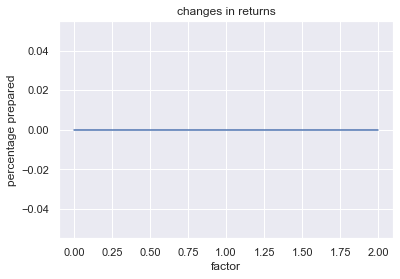

In [16]:
plt.plot(factors, l_prepared)
plt.title('changes in returns')
plt.xlabel('factor')
plt.ylabel('percentage prepared')
plt.show()

# Using CPR with other inputs

More info on the variables here: http://ire.hec.ca/en/wp-content/uploads/sites/3/2020/06/cpr-report-2020-final.pdf

In [17]:
inputs.head()

,byear,sex,ret_age,education,init_wage,pension,bal_rrsp,bal_tfsa,bal_other_reg,bal_unreg,cont_rate_rrsp,cont_rate_tfsa,cont_rate_other_reg,cont_rate_unreg,withdrawal_rrsp,withdrawal_tfsa,withdrawal_other_reg,withdrawal_unreg,replacement_rate_db,rate_employee_db,income_previous_db,init_dc,rate_employee_dc,rate_employer_dc,s_byear,s_sex,s_ret_age,s_education,s_init_wage,s_pension,s_bal_rrsp,s_bal_tfsa,s_bal_other_reg,s_bal_unreg,s_cont_rate_rrsp,s_cont_rate_tfsa,s_cont_rate_other_reg,s_cont_rate_unreg,s_withdrawal_rrsp,s_withdrawal_tfsa,s_withdrawal_other_reg,s_withdrawal_unreg,s_replacement_rate_db,s_rate_employee_db,s_income_previous_db,s_init_dc,s_rate_employee_dc,s_rate_employer_dc,weight,couple,prov,first_residence,second_residence,price_first_residence,price_second_residence,business,price_business,mix_bonds,mix_bills,mix_equity,fee,fee_equity,credit_card,personal_loan,student_loan,car_loan,credit_line,first_mortgage,second_mortgage,other_debt,credit_card_payment,personal_loan_payment,student_loan_payment,car_loan_payment,credit_line_payment,first_mortgage_payment,second_mortgage_payment,other_debt_payment,claim_age_cpp,s_claim_age_cpp,cap_gains_unreg,s_cap_gains_unreg,realized_losses_unreg,s_realized_losses_unreg,init_room_rrsp,init_room_tfsa,s_init_room_rrsp,s_init_room_tfsa
0,1980,male,65,less than high school,60000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,False,qc,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.0,NaN,0,0,0,0,0,0,NaN,NaN


In [18]:
# saving copy of dataframe
inputs.iloc[0, :].to_frame().T.to_csv('my_inputs.csv', index=False)

In [19]:
my_inputs = pd.read_csv('my_inputs.csv')

In [20]:
my_res = main.run_simulations(my_inputs, 100, non_stochastic=False)
my_res.check_preparedness()
df = my_res.df_merged

df.prepared.value_counts(normalize=True)

False    1.0
Name: prepared, dtype: float64

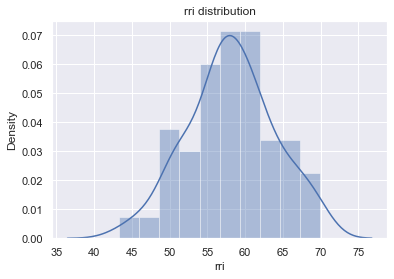

In [21]:
ax = sns.distplot(df.loc[df.rri<500, 'rri'])
ax.grid()
ax.set_title('rri distribution')
ax.grid()
plt.show()